#### This notebook bootstraps our pilot crowding thresholds and reading speeds to estimate the 95% CI of our sample correlation.
Created Apr 29, 2025

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr, norm, gmean, sem, median_abs_deviation
import matplotlib.ticker as ticker
import random

In [7]:
random.seed(42)

In [8]:
# Data from pre-VSS experiment
df = pd.read_csv('crowdingReadingAcuity_dec24_cleaned.csv').iloc[:,1:]
df['crowding_L5_var'] = np.var(df[['crowding_L5_test', 'crowding_L5_retest']], axis=1)
df['crowding_R5_var'] = np.var(df[['crowding_R5_test', 'crowding_R5_retest']], axis=1)

In [11]:
df.head()

,participant,ProlificParticipantID,crowding_L5_test,crowding_R5_test,crowding_L5_retest,crowding_R5_retest,reading_Beaver_test,reading_Winter_retest,rsvp_foveal_test,rsvp_foveal_retest,...,crowding_R,crowding_L,crowding,rsvp,reading,crowding_var,rsvp_var,reading_var,crowding_L5_var,crowding_R5_var
0,AlertGreenBat408,5d1e4a3ed4b9d60001ec8f1c,0.115156,0.305483,-0.124971,0.315851,2.115644,2.234645,2.996684,2.964187,...,0.310667,-0.004907,0.152880,2.980435,2.175145,0.042824,0.000528,0.007081,0.014415,0.000027
1,AlertNeonBat971,5cbab879d7ebf300167feea4,0.127040,-0.130770,0.047602,-0.145697,2.286359,2.408637,3.100061,2.983906,...,-0.138233,0.087321,-0.025456,3.041983,2.347498,0.018047,0.006746,0.007476,0.001578,0.000056
2,AlertNeonMouse999,66bce8ffb61a51410b552a2d,-0.431417,-0.188759,0.049006,-0.099462,2.495096,2.461877,2.570615,2.943560,...,-0.144110,-0.191206,-0.167658,2.757088,2.478487,0.040536,0.069544,0.000552,0.057701,0.001993
3,AlertSkyBird989,672501c7bc2f7f52114f2a5e,-0.143431,0.197870,-0.171548,-0.213859,2.508871,2.440305,3.377244,3.466117,...,-0.007995,-0.157489,-0.082742,3.421680,2.474588,0.035835,0.003949,0.002351,0.000198,0.042380
4,AlertYellowFox366,5f4538b6ffe9f50c3cbe3ae1,0.006815,-0.294273,-0.190656,-0.315644,2.519304,2.594551,2.835489,2.887658,...,-0.304959,-0.091921,-0.198440,2.861573,2.556927,0.021704,0.001361,0.002831,0.009749,0.000114


## Bootstrap and compute 95% CI

In [12]:
def bootstrap_corr_ci(x, y, n_bootstrap=10000, ci=95):
    """
    Bootstrap the Pearson correlation between x and y and return a confidence interval.
    x, y: 1D arrays of the same length (e.g., crowding and reading speed)
    
    Returns:
    - lower, upper: bounds of the CI
    - boot_corrs: array of bootstrap correlation estimates
    """
    x = np.asarray(x)
    y = np.asarray(y)
    
    n = len(x)
    boot_corrs = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        idx = np.random.choice(n, size=n, replace=True)
        boot_corrs[i] = np.corrcoef(x[idx], y[idx])[0, 1]
    
    alpha = 100 - ci
    lower = np.percentile(boot_corrs, alpha / 2)
    upper = np.percentile(boot_corrs, 100 - alpha / 2)
    
    return lower, upper, boot_corrs

In [13]:
lower, upper, boot_corrs = bootstrap_corr_ci(df['crowding'], df['rsvp'], n_bootstrap=10000, ci=95)
print(f"95% CI for correlation: [{lower:.3f}, {upper:.3f}]")

95% CI for correlation: [-0.679, -0.284]


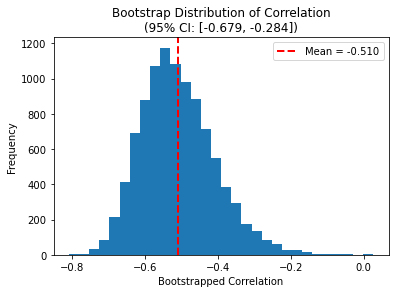

In [16]:
mean_corr = np.mean(boot_corrs)
plt.hist(boot_corrs, bins=30)
plt.axvline(mean_corr, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_corr:.3f}')
plt.xlabel('Bootstrapped Correlation')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Correlation\n(95% CI: [{:.3f}, {:.3f}])'.format(lower, upper))
plt.legend()
plt.show()

In [19]:
pearsonr(df['crowding'], df['rsvp'])[0].round(3)

-0.516